# **1. PyTorch Neural Networks**

[PyTorch](https://pytorch.org/) is a Python package for defining and training neural networks.  Neural networks and deep learning have been a hot topic for several years, and are the tools underlying many state-of-the art machine learning tasks.  There are many industrial applications (e.g. at your favorite or least favorite companies in Silicon Valley), but also many scientific applications including
* Processing data in particle detectors
* Seismic imaging / medical imaging
* Accelerating simulations of physical phenomena
* ...

A (deep) feed-forward neural network is the composition of functions
\begin{equation}
f_N(x; w_N, b_N) \circ f_{N-1}(x; w_{N-1}, b_{N-1}) \circ \dots f_0(x; w_0, b_0)
\end{equation}
where each $f_i(x; w_i, b_i)$ is a (non-linear) function with learnable parameters $w_i, b_i$.  There are many choices for what the exact function is.  A common and simple one to describe is an (affine) linear transformation followed by a non-linearity.
\begin{equation}
f_i(x; w_i, b_i) = (w_i \cdot x + b_i)_+
\end{equation}

where $w_i \cdot x$ is matrix-vector multiplication, and $(\cdot)_+$ is the ReLU operation (Rectified Linear Unit)
\begin{equation}
x_+ = \begin{cases}
x & x > 0\\
0 & x \le 0
\end{cases}
\end{equation}

If you take the composition of several functions like this, you have a multilayer perceptron (MLP).


### **Deep Learning Libraries**

There are many deep learning libraries available, the most common ones for python are

- TensorFlow, Keras
- PyTorch

Working with tensorflow requires going into lot of details of the contruction of the computation graph, whereas Keras is a higher level interface for tensorflow. Tensorflow is very popular in the industry and good for production code.

PyTorch can be used as low level interface, but is much more user-friendly than tensorflow, but it also has a higher level interface. Pytorch is more popular in the research community.

### **Main features that any deep learning library should provide**

No matter what library or language you use, the main features provided by a deep learning library are
1. Use the GPU to speed up computation
2. Ability to do automatic differentiation (CPU tự động tổng hợp các kết quả GPU trả về)
3. Useful library functions for common architectures and optimization algorithms

# **2. PyTorch**
We will look at all of the above in pytorch.
The best way to think about pytorch is that its numpy + GPU + autograd.

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.0+cu121


### **2.1 Automatic Differentiation**

[Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) is different from numerical differentiation, which requires a choice of step size, and symbolic differentiation which creates a single expression for a derivative.  Instead it performs chain rule repeatedly.

PyTorch uses dynamic computation graphs to compute the gradients of the parameters.

In [14]:
x = torch.tensor([2.0]) # khai báo 1 scalar tensor

# requires_grad=True cho phép m có khả năng như 1 tham số
# trong quá trình học, hoạt động, nếu cần giá trị này sẽ được cập nhật lại bằng gradient
# như việc cập nhật các trọng số khi lan truyền ngược, m và c sẽ được cập nhật còn hằng số x thì không.
m = torch.tensor([5.0], requires_grad=True)
c = torch.tensor([2.0], requires_grad=True)

##### **2.1.1 ForWard**

In [15]:
y = m*x+c
y

tensor([12.], grad_fn=<AddBackward0>)

In [16]:
# Define an error for your function
loss = torch.norm(13-y) # loss=o.5*(13-y)^2
loss

tensor(1., grad_fn=<LinalgVectorNormBackward0>)

In [17]:
# Đạo hàm riêng của loss theo m
m.grad

##### **2.1.1 BackWard**

>**Note:**
* Calling `x.backward()` on any tensor forces pytorch to compute all the gradients of the tensors used to compute `x` which had the `requires_grad` flag set to `True`. The computed gradient will be stored in the `.grad` property of the tensors

In [18]:
loss.backward()
# loss=0.5(13-y)^2 ==> m.grad=-x=-2
m.grad

tensor([-2.])

In [19]:
# Đạo hàm riêng của loss theo c bằng -1, khi c thay đổi một lượng, thì loss thay đổi một lượng bằng -1
# loss=0.5(13-y)^2 ==> c.grad=-1
c.grad

tensor([-1.])

In [20]:
# Cập nhật m, c mới: m_new = m_old-LearningRate*m.grad
with torch.no_grad():
  m -= 0.01*m.grad
  c -= 0.3*c.grad

print(m)
print(c)

tensor([5.0200], requires_grad=True)
tensor([2.3000], requires_grad=True)


>**Note:**
* m, c ban đầu là 5.0 và 2.0 đã được cập nhật giá trị mới thành 5.02 và 2.3

In [21]:
m.grad, c.grad

(tensor([-2.]), tensor([-1.]))

In [22]:
# Ở lần cập nhật tiếp theo, sẽ cần phải tính lại đạo hàm mới
# vì thế để model ko dùng gradient của lần trước để cập nhật
# ta cần set 2 giá trị này về 0 trước.
m.grad.zero_()
c.grad.zero_()
m.grad, c.grad

(tensor([0.]), tensor([0.]))

##### **2.1.3 Tiếp tục quy trình ForWard và BackWard như bên trên**

In [24]:
# Tính lại y, y sẽ thay đổi so với lần trước, do m và c đã được cạp nhật lại
y=m*x+c
y

tensor([12.3400], grad_fn=<AddBackward0>)

In [25]:
loss=torch.norm(13-y)
loss

tensor(0.6600, grad_fn=<LinalgVectorNormBackward0>)

>**Note:**
* Loss ban đầu bằng 1 bây giờ đã giảm xuống còn 0.66

In [26]:
loss.backward()
m.grad, c.grad

(tensor([-2.]), tensor([-1.]))

In [27]:
with torch.no_grad():
  m -= 0.01*m.grad
  c -= 0.3*c.grad

print(m)
print(c)

tensor([5.0400], requires_grad=True)
tensor([2.6000], requires_grad=True)


In [28]:
m.grad.zero_()
c.grad.zero_()
m.grad, c.grad

(tensor([0.]), tensor([0.]))

In [30]:
# Sau 2 lần cập nhật, y càng gần hơn với target là 13
y=m*x+c
y

tensor([12.6800], grad_fn=<AddBackward0>)

In [31]:
loss = torch.norm(13-y)
loss

tensor(0.3200, grad_fn=<LinalgVectorNormBackward0>)

>**Note:**
* Trên đây là 1 ví dụ đơn giản về việc cập nhật trọng số bằng phương pháp lan truyền ngược.
* Sau 2 lần cập nhật lại trọng số loss đã giảm từ 1 xuống còn 0.66 rồi xuống tiếp 0.32
* y từ 12 tăng dần lên 12.24 rồi lên 12.68, ngày càng gần 13.
* Các lần cập nhật tiếp theo cũng tương tự.

### **2.2 Making it more compact**
* Kết hợp phần Automatic Differentiation lại

In [32]:
def model_fn(x, m, c):
  return m*x+c

def loss_fn(y, yt):
  return torch.norm(yt-y)

In [33]:
m = torch.tensor([5.0], requires_grad=True)
c = torch.tensor([2.0], requires_grad=True)

x = torch.tensor([2.0])
yt = torch.tensor([13.0])

In [34]:
i=5
while True:
  i-=1
  y = model_fn(x, m, c)
  loss = loss_fn(y, yt)
  loss.backward()
  with torch.no_grad():
    m -= 0.05*m.grad
    c -= 0.05*c.grad
  m.grad.zero_()
  c.grad.zero_()
  print(f'm={m}\n c={c}\n y={y}\n loss={loss}')

  if i==0:
    break

m=tensor([5.1000], requires_grad=True)
 c=tensor([2.0500], requires_grad=True)
 y=tensor([12.], grad_fn=<AddBackward0>)
 loss=1.0
m=tensor([5.2000], requires_grad=True)
 c=tensor([2.1000], requires_grad=True)
 y=tensor([12.2500], grad_fn=<AddBackward0>)
 loss=0.75
m=tensor([5.3000], requires_grad=True)
 c=tensor([2.1500], requires_grad=True)
 y=tensor([12.5000], grad_fn=<AddBackward0>)
 loss=0.5
m=tensor([5.4000], requires_grad=True)
 c=tensor([2.2000], requires_grad=True)
 y=tensor([12.7500], grad_fn=<AddBackward0>)
 loss=0.2500009536743164
m=tensor([5.5000], requires_grad=True)
 c=tensor([2.2500], requires_grad=True)
 y=tensor([13.0000], grad_fn=<AddBackward0>)
 loss=9.5367431640625e-07


>**Note:**
* Qua 5 lần cập nhật giá trị của m, c loss giảm từ 1 về xấp xỉ 0, giá trị của y cũng tăng dần và bằng yt.

##### **2.2.1 An explicit loop**

loss=21.963178634643555
loss=21.924739837646484
loss=21.92452621459961
loss=21.924524307250977
loss=21.924524307250977
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21.92452621459961
loss=21

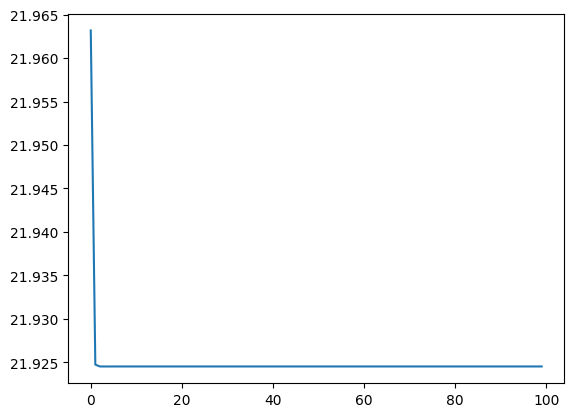

In [59]:
x = torch.randn(5, 100)
yt = torch.randn(1, 100)
losses = []

for i in range(100):
  y = model_fn(x, m ,c)
  loss = loss_fn(y, yt)
  loss.backward()
  with torch.no_grad():
    m -= 0.05*m.grad
    c -= 0.05*c.grad

  m.grad.zero_()
  c.grad.zero_()

  losses+=[loss.item()] # Tensor.item() → number (More at https://pytorch.org/docs/stable/generated/torch.Tensor.item.html)
  print(f'loss={loss}')

plt.plot(losses)

In [56]:
# Phương thức losses+=[loss.item()] cho ra kết quả tương đương với losses.append(loss.item())
losses1 = []
loss1 = torch.tensor(137.51451110839844)
print(loss1.item())
losses1+=[loss1.item()]
print(losses1)

loss2 = torch.tensor(20.811166763305664)
print(loss2.item())
losses1.append(loss2.item())
print(losses1)

137.51451110839844
[137.51451110839844]
20.811166763305664
[137.51451110839844, 20.811166763305664]


>**Note:**
* CallBack: kiểm tra ngược lại sau mỗi vòng lặp.

##### **2.2.2 Using Library functions**
* The subpackage `torch.nn` provides an object-oriented library of functions that can be composed together.


In [60]:
model = torch.nn.Sequential(torch.nn.Linear(5, 5),  # 5 x 5 matrix: khởi tạo 5 node input
                            torch.nn.ReLU(),        # ReLU nonlinearity: khởi tạo hàm active
                            torch.nn.Linear(5, 5))  # 5 x 5 matrix: Khởi tạo lớp tiếp theo gồm 5 node sau khi active ở trên

In [61]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2918, -0.2018,  0.0586,  0.2812, -0.3852],
         [ 0.4392,  0.2014,  0.0956, -0.1978, -0.1298],
         [ 0.4051,  0.0973, -0.0555,  0.3779,  0.1947],
         [-0.3568, -0.0889,  0.3472, -0.2116,  0.3730],
         [ 0.0530,  0.2741,  0.1021, -0.3403,  0.0198]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3398, -0.1699, -0.0555, -0.1168, -0.3345], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3155, -0.1709, -0.2604,  0.1731, -0.1861],
         [-0.0250,  0.0455,  0.3586,  0.2185, -0.1755],
         [ 0.4219, -0.4028, -0.2421,  0.3891, -0.2832],
         [-0.0212, -0.0409, -0.3894,  0.1476, -0.0835],
         [-0.3636, -0.1085,  0.2237, -0.1464,  0.3940]], requires_grad=True),
 Parameter containing:
 tensor([-0.4432, -0.0353,  0.1016,  0.1436, -0.4328], requires_grad=True)]

In [65]:
from torchsummary import summary

# imput shape:(100, 5), 2 Linear Layer, mỗi layer có 5*5+5=30 parameter
summary(model, (100, 5))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 100, 5]              30
              ReLU-2               [-1, 100, 5]               0
            Linear-3               [-1, 100, 5]              30
Total params: 60
Trainable params: 60
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [66]:
# Hàm loss MSE: Mean Spare Error
loss_fn = torch.nn.MSELoss(reduction='sum')

In [71]:
# In this case, fit the model to random data.
x = torch.randn(100, 5)
yt = torch.randn(100, 5)
losses = []

>**Note:**
* Optimizers in `torch.optim` implement a variety of optimization strategies.  Almost all are based on gradient descent, since forming Hessians is prohibitive.

In [72]:
# Cập nhật tham số bằng thuật toán Adam và learning-rate=0.03
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

loss=584.2015380859375
loss=554.3087158203125
loss=537.3233642578125
loss=526.1400756835938
loss=516.65234375
loss=509.35614013671875
loss=504.0904235839844
loss=499.052734375
loss=494.2554626464844
loss=490.143310546875
loss=486.6004333496094
loss=483.8157958984375
loss=481.8280029296875
loss=480.0141296386719
loss=478.30743408203125
loss=476.6197814941406
loss=475.009765625
loss=473.63360595703125
loss=471.9818115234375
loss=470.3333740234375
loss=468.80377197265625
loss=467.4395446777344
loss=466.2744140625
loss=465.66180419921875
loss=464.9438781738281
loss=464.074951171875
loss=463.1139221191406
loss=462.02593994140625
loss=460.7935485839844
loss=459.8014221191406
loss=458.92950439453125
loss=458.08984375
loss=457.3658447265625
loss=456.69415283203125
loss=455.9297790527344
loss=455.2259521484375
loss=454.5310974121094
loss=453.7389831542969
loss=453.0257873535156
loss=452.49163818359375
loss=452.10552978515625
loss=451.912841796875
loss=451.63555908203125
loss=451.2239990234375
l

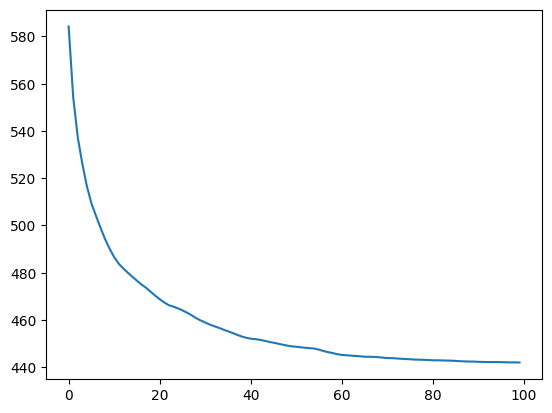

In [73]:
for i in range(100):
  y = model(x)
  loss = loss_fn(y, yt)
  loss.backward()

  optimizer.step()      # Cập nhật các tham số mới (tương ứng với phần with torch.no_grad() bên trên)
  optimizer.zero_grad() # Set lại các gradient bằng 0

  losses+=[loss.item()]
  print(f'loss={loss}')

plt.plot(losses)

>**Note:**
* Loss giảm đều và đẹp (không có đoạn nào lên xuống thất thường)
* ==> Model hiệu quả